In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t
from datetime import datetime, timedelta

In [2]:
path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'

file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2018-06-18    0.001116
2018-06-19   -0.012375
2018-06-20    0.001680
2018-06-21    0.000826
2018-06-22   -0.005763
2018-06-25   -0.000148
2018-06-26    0.009169
2018-06-27    0.007486
2018-06-28   -0.000443
2018-06-29   -0.003709
2018-07-02    0.006971
2018-07-03   -0.012590
2018-07-05   -0.002425
2018-07-06    0.003547
Name: Adj Close, dtype: float64


C:\Users\Janet\AppData\Local\Temp\ipykernel_26548\2751072697.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_returns = model.params[0] + model.params[1] * market_returns[event_window]


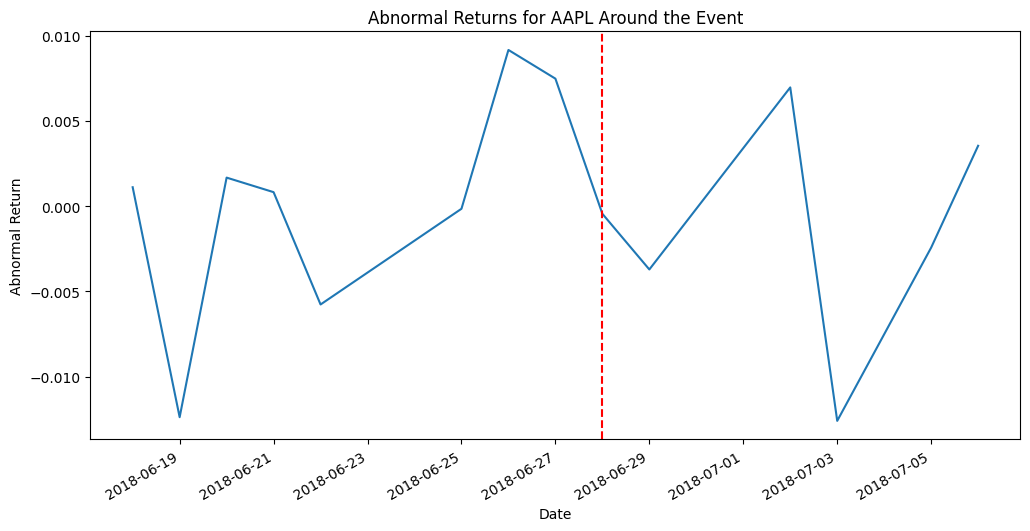

In [4]:

# Define the stock and market index
stock_ticker = 'AAPL'  # Example: Apple Inc.
market_index_ticker = '^GSPC'  # Example: S&P 500

# Define the event date and windows
event_date = datetime(2018, 6, 28)
estimation_window_start = event_date - timedelta(days=365)
estimation_window_end = event_date - timedelta(days=30)
event_window_start = event_date - timedelta(days=10)
event_window_end = event_date + timedelta(days=10)

# Fetch historical data
stock_data = yf.download(stock_ticker, start=estimation_window_start, end=event_window_end)
market_data = yf.download(market_index_ticker, start=estimation_window_start, end=event_window_end)

# Calculate daily returns
stock_returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()

# Estimate the market model (CAPM) during the estimation window
estimation_window = (stock_returns.index >= estimation_window_start) & (stock_returns.index <= estimation_window_end)
X = sm.add_constant(market_returns[estimation_window])  # Market returns
y = stock_returns[estimation_window]  # Stock returns
model = sm.OLS(y, X).fit()

# Calculate expected and abnormal returns during the event window
event_window = (stock_returns.index >= event_window_start) & (stock_returns.index <= event_window_end)
expected_returns = model.params[0] + model.params[1] * market_returns[event_window]
abnormal_returns = stock_returns[event_window] - expected_returns

# Output the results
print(abnormal_returns)

# Plotting the abnormal returns
plt.figure(figsize=(12, 6))
abnormal_returns.plot()
plt.title(f'Abnormal Returns for {stock_ticker} Around the Event')
plt.xlabel('Date')
plt.ylabel('Abnormal Return')
plt.axvline(x=event_date, color='red', linestyle='--')  # Event date line
plt.show()

Event study for AAPL:
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
Average Abnormal Return for AAPL: -0.00047568206929191954
Event study for MSFT:
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Average Abnormal Return for MSFT: 0.0004956823580026185
Event study for GOOGL:
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Average Abnormal Return for GOOGL: 0.0006094731833447641


C:\Users\Janet\AppData\Local\Temp\ipykernel_31716\158936557.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_returns = model.params[0] + model.params[1] * market_returns[event_window]
C:\Users\Janet\AppData\Local\Temp\ipykernel_31716\158936557.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_returns = model.params[0] + model.params[1] * market_returns[event_window]
C:\Users\Janet\AppData\Local\Temp\ipykernel_31716\158936557.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

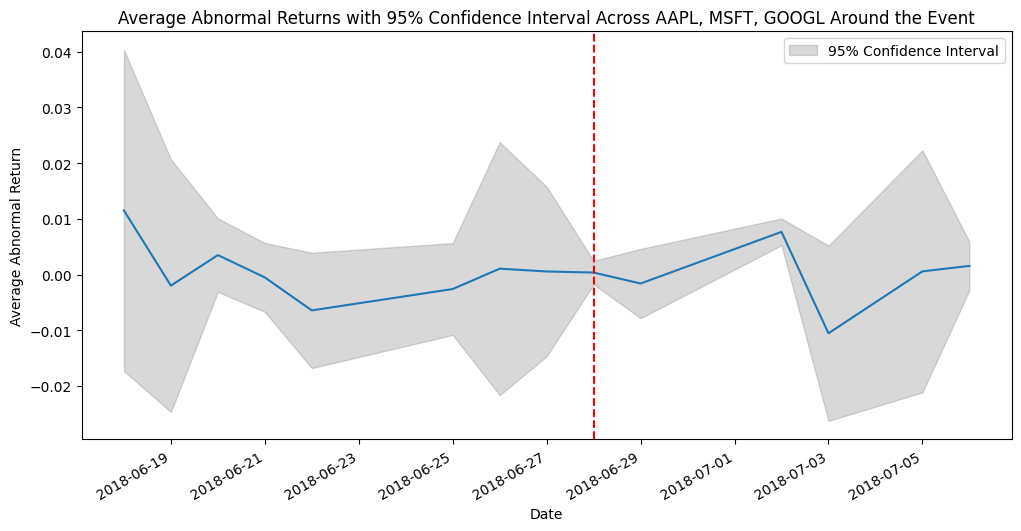

In [12]:

def run_event_study(stock_ticker, event_date):
    # Define the market index
    market_index_ticker = '^GSPC'  # S&P 500

    # Define windows
    estimation_window_start = event_date - timedelta(days=365)
    estimation_window_end = event_date - timedelta(days=30)
    event_window_start = event_date - timedelta(days=10)
    event_window_end = event_date + timedelta(days=10)

    # Fetch historical data
    stock_data = yf.download(stock_ticker, start=estimation_window_start, end=event_window_end)
    market_data = yf.download(market_index_ticker, start=estimation_window_start, end=event_window_end)

    # Calculate daily returns
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    # Estimate the market model during the estimation window
    estimation_window = (stock_returns.index >= estimation_window_start) & (stock_returns.index <= estimation_window_end)
    X = sm.add_constant(market_returns[estimation_window])
    y = stock_returns[estimation_window]
    model = sm.OLS(y, X).fit()

    # Calculate expected and abnormal returns during the event window
    event_window = (stock_returns.index >= event_window_start) & (stock_returns.index <= event_window_end)
    expected_returns = model.params[0] + model.params[1] * market_returns[event_window]
    abnormal_returns = stock_returns[event_window] - expected_returns

    # Calculate the average abnormal return
    average_abnormal_return = abnormal_returns.mean()

    # # Plotting
    # plt.figure(figsize=(12, 6))
    # abnormal_returns.plot(title=f'Abnormal Returns for {stock_ticker} Around the Event')
    # plt.axvline(x=event_date, color='red', linestyle='--')  # Event date line
    # plt.axhline(y=average_abnormal_return, color='blue', linestyle='--', label='Average Abnormal Return')  # Average line
    # plt.xlabel('Date')
    # plt.ylabel('Abnormal Return')
    # plt.legend()
    # plt.show()

    # Display the average abnormal return
    print(f"Average Abnormal Return for {stock_ticker}: {average_abnormal_return}")

    return abnormal_returns
# def run_event_study(stock_ticker, event_date):
#     # [Previous code parts remain unchanged]

#     # Return the abnormal returns
#     return abnormal_returns

# Example usage
stock_list = ['AAPL', 'MSFT', 'GOOGL']  # List of stocks to analyze
event_date = datetime(2018, 6, 28)  # Example event date

# Dictionary to hold abnormal returns for each stock
all_abnormal_returns = {}

for stock in stock_list:
    print(f"Event study for {stock}:")
    all_abnormal_returns[stock] = run_event_study(stock, event_date)

# Calculate average abnormal returns across stocks for each day
average_abnormal_returns = pd.concat(all_abnormal_returns, axis=1).mean(axis=1)

# Calculate the standard error of the average abnormal returns
std_error = pd.concat(all_abnormal_returns, axis=1).std(axis=1) / np.sqrt(len(stock_list))

# Determine the t-statistic for a 95% confidence interval
t_stat = t.ppf(1-0.025, df=len(stock_list)-1)

# Calculate the confidence intervals
ci_lower = average_abnormal_returns - (t_stat * std_error)
ci_upper = average_abnormal_returns + (t_stat * std_error)

# Plotting
plt.figure(figsize=(12, 6))
average_abnormal_returns.plot(title='Average Abnormal Returns with 95% Confidence Interval Across AAPL, MSFT, GOOGL Around the Event')
plt.fill_between(average_abnormal_returns.index, ci_lower, ci_upper, color='grey', alpha=0.3, label='95% Confidence Interval')
plt.axvline(x=event_date, color='red', linestyle='--')  # Event date line
plt.xlabel('Date')
plt.ylabel('Average Abnormal Return')
plt.legend()
plt.show()


In [13]:
import yfinance as yf

# Define the ticker symbol for the company you're interested in
ticker_symbol = 'AAPL'  # Example for Apple Inc.

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Get company information including sector
company_info = ticker.info

# Get stock price (using the closing price of the latest trading day)
stock_price = company_info.get('previousClose')

# Get the sector
company_sector = company_info.get('sector')

print(f"Company: {ticker_symbol}")
print(f"Sector: {company_sector}")
print(f"Stock Price: {stock_price}")


Company: AAPL
Sector: Technology
Stock Price: 191.31


In [ ]:
# Calculate daily returns
stock_returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()

# Estimate the market model (CAPM) during the estimation window
estimation_window = (stock_returns.index >= estimation_window_start) & (stock_returns.index <= estimation_window_end)
X = sm.add_constant(market_returns[estimation_window])  # Market returns
y = stock_returns[estimation_window]  # Stock returns
model = sm.OLS(y, X).fit()

# Calculate expected and abnormal returns during the event window
event_window = (stock_returns.index >= event_window_start) & (stock_returns.index <= event_window_end)
expected_returns = model.params[0] + model.params[1] * market_returns[event_window]
abnormal_returns = stock_returns[event_window] - expected_returns

# Output the results
print(abnormal_returns)

# Plotting the abnormal returns
plt.figure(figsize=(12, 6))
abnormal_returns.plot()
plt.title(f'Abnormal Returns for {stock_ticker} Around the Event')
plt.xlabel('Date')
plt.ylabel('Abnormal Return')
plt.axvline(x=event_date, color='red', linestyle='--')  # Event date line
plt.show()

In [ ]:

# Define the stock and market index
stock_ticker = 'AAPL'  # Example: Apple Inc.
market_index_ticker = '^GSPC'  # Example: S&P 500

# Define the event date and windows
event_date = datetime(2020, 1, 1)
estimation_window_start = event_date - timedelta(days=365)
estimation_window_end = event_date - timedelta(days=30)
event_window_start = event_date - timedelta(days=10)
event_window_end = event_date + timedelta(days=10)

# Fetch historical data
stock_data = yf.download(stock_ticker, start=estimation_window_start, end=event_window_end)
market_data = yf.download(market_index_ticker, start=estimation_window_start, end=event_window_end)





In [ ]:

def run_event_study(stock_ticker, event_date):
    # # Define the market index
    # market_index_ticker = '^GSPC'  # S&P 500

    # # Define windows
    # estimation_window_start = event_date - timedelta(days=365)
    # estimation_window_end = event_date - timedelta(days=30)
    # event_window_start = event_date - timedelta(days=10)
    # event_window_end = event_date + timedelta(days=10)

    # # Fetch historical data
    # stock_data = yf.download(stock_ticker, start=estimation_window_start, end=event_window_end)
    # stock_data['Ticker'] = stock_ticker
    # market_data = yf.download(market_index_ticker, start=estimation_window_start, end=event_window_end)
    # stock_data.to_csv('stock_data.csv')
    # market_data.to_csv('market_data.csv')

    estimation_window_start = event_date - timedelta(days=365)
    estimation_window_end = event_date - timedelta(days=30)
    event_window_start = event_date - timedelta(days=10)
    event_window_end = event_date + timedelta(days=10)

    # Fetch historical data for the stock
    stock_data = yf.download(stock_ticker, start=estimation_window_start, end=event_window_end)
    stock_data['Ticker'] = stock_ticker

    # Save the stock data to a CSV file
    stock_data.to_csv('stock_data.csv')

    # Calculate daily returns
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    # Estimate the market model during the estimation window
    estimation_window = (stock_returns.index >= estimation_window_start) & (stock_returns.index <= estimation_window_end)
    X = sm.add_constant(market_returns[estimation_window])
    y = stock_returns[estimation_window]
    model = sm.OLS(y, X).fit()

    # Calculate expected and abnormal returns during the event window
    event_window = (stock_returns.index >= event_window_start) & (stock_returns.index <= event_window_end)
    expected_returns = model.params[0] + model.params[1] * market_returns[event_window]
    abnormal_returns = stock_returns[event_window] - expected_returns

    # Calculate the average abnormal return
    average_abnormal_return = abnormal_returns.mean()

    # # Plotting
    # plt.figure(figsize=(12, 6))
    # abnormal_returns.plot(title=f'Abnormal Returns for {stock_ticker} Around the Event')
    # plt.axvline(x=event_date, color='red', linestyle='--')  # Event date line
    # plt.axhline(y=average_abnormal_return, color='blue', linestyle='--', label='Average Abnormal Return')  # Average line
    # plt.xlabel('Date')
    # plt.ylabel('Abnormal Return')
    # plt.legend()
    # plt.show()

    # Display the average abnormal return
    print(f"Average Abnormal Return for {stock_ticker}: {average_abnormal_return}")

    return abnormal_returns
# def run_event_study(stock_ticker, event_date):
#     # [Previous code parts remain unchanged]

#     # Return the abnormal returns
#     return abnormal_returns


stock_list = ['ATUS', 'AFTM', 'ATUS']  # List of stocks to analyze
event_date = datetime(2018, 6, 28)  # Example event date


all_abnormal_returns = {}

for stock in stock_list:
    print(f"Event study for {stock}:")
    all_abnormal_returns[stock] = run_event_study(stock, event_date)


average_abnormal_returns = pd.concat(all_abnormal_returns, axis=1).mean(axis=1)


std_error = pd.concat(all_abnormal_returns, axis=1).std(axis=1) / np.sqrt(len(stock_list))

# Determine the t-statistic for a 95% confidence interval
t_stat = t.ppf(1-0.025, df=len(stock_list)-1)

# Calculate the confidence intervals
ci_lower = average_abnormal_returns - (t_stat * std_error)
ci_upper = average_abnormal_returns + (t_stat * std_error)

# Plotting
plt.figure(figsize=(12, 6))
average_abnormal_returns.plot(title='Average Abnormal Returns with 95% Confidence Interval Across AAPL, MSFT, GOOGL Around the Event')
plt.fill_between(average_abnormal_returns.index, ci_lower, ci_upper, color='grey', alpha=0.3, label='95% Confidence Interval')
plt.axvline(x=event_date, color='red', linestyle='--')  # Event date line
plt.xlabel('Date')
plt.ylabel('Average Abnormal Return')
plt.legend()
plt.show()
